# Summer Olympics Medal Counts

This is exercise in exploratory data analysis. Using a dataset from kaggle found [here](https://www.kaggle.com/the-guardian/olympic-games/data), I looked at the Summer Olympics Medal Count by country and category. Before I can start my analysis, I needed to call the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('csv_files/summer.csv')

In [3]:
print(data.shape)
data.head()

(31165, 9)


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


I want to check the top countries in terms of total medals. I saved down a new dataframe with just those two columns to work with and I'm going to want to visualize my top 10 countries.

In [4]:
country_medal_count = data[['Country', 'Medal']]
country_medal_count.head()

,Country,Medal
0,HUN,Gold
1,AUT,Silver
2,GRE,Bronze
3,GRE,Gold
4,GRE,Silver


Group By will help me here. I grouped by 'Country' and counted the total number of medals. A quick sort will allow me to see where the countries fall. There are a lot of countries in this list so I only want to see the top 10. Before I graph the top 10, I wanted to reset the index. This way I could call the country as my 'x' for my bar graph. It's a useful trick to make use of the index column.

In [5]:
country_medals = country_medal_count.groupby(['Country']).count()
country_medals.sort_values(['Medal'], ascending = False)[:10]

,Medal
Country,
USA,4585
URS,2049
GBR,1720
FRA,1396
GER,1305
ITA,1296
AUS,1189
HUN,1079
SWE,1044


In [6]:
top_countries = country_medals.sort_values(['Medal'], ascending = False)[:10]
top_countries.reset_index(inplace=True)

top_countries

,Country,Medal
0,USA,4585
1,URS,2049
2,GBR,1720
3,FRA,1396
4,GER,1305
5,ITA,1296
6,AUS,1189
7,HUN,1079
8,SWE,1044
9,NED,851


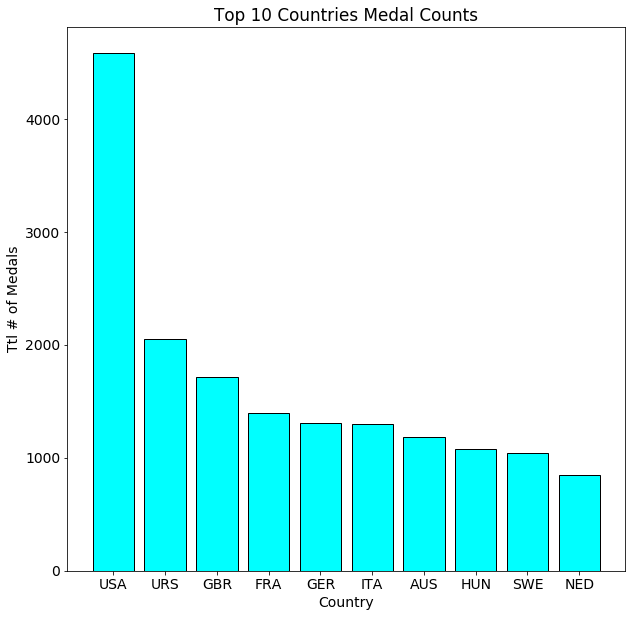

In [7]:
x = top_countries['Country']
y = top_countries['Medal']

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10,10))

plt.rcParams.update({'font.size': 14})

plt.bar(x_pos, y, color = 'cyan', edgecolor = 'black')
plt.xlabel('Country')
plt.ylabel('Ttl # of Medals')
plt.title('Top 10 Countries Medal Counts')

plt.xticks(x_pos, x)

plt.show()

The US far outpaces all other countries in terms of medal count. The uS has earned 4.6k medals in the summer games since 1986. Russia follows with 2.0k medals. Now this gives me the total number of medals, but who leads in gold medals?

In [8]:
gold_medals = data[['Country', 'Medal']]
gold_medals = gold_medals[gold_medals['Medal']=='Gold']
gold_medals.head()

,Country,Medal
0,HUN,Gold
3,GRE,Gold
6,HUN,Gold
9,AUT,Gold
13,USA,Gold


In [9]:
top_gold = gold_medals.groupby(['Country']).count()
top_gold.sort_values(['Medal'], ascending = False)[:10]

,Medal
Country,
USA,2235
URS,838
GBR,546
ITA,476
GER,452
HUN,412
FRA,408
SWE,349
GDR,329


In [10]:
top_gold = top_gold.sort_values(['Medal'], ascending = False)[:10]
top_gold.reset_index(inplace=True)

top_gold

,Country,Medal
0,USA,2235
1,URS,838
2,GBR,546
3,ITA,476
4,GER,452
5,HUN,412
6,FRA,408
7,SWE,349
8,GDR,329
9,AUS,312


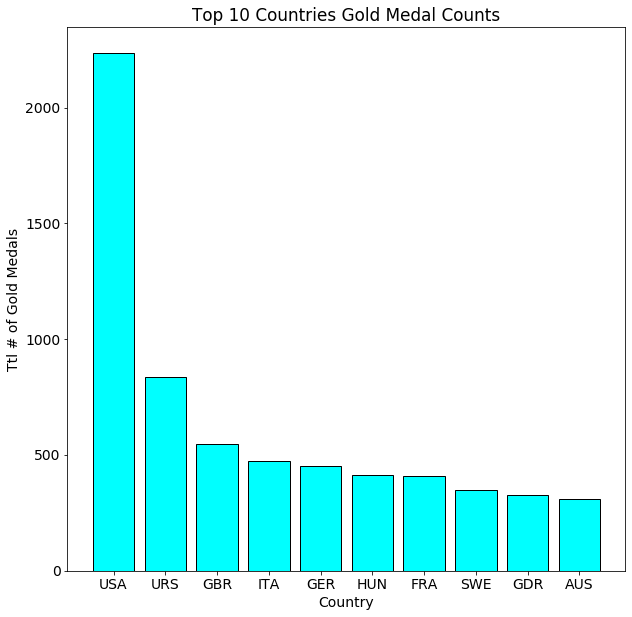

In [11]:
x = top_gold['Country']
y = top_gold['Medal']

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10,10))

plt.rcParams.update({'font.size': 14})

plt.bar(x_pos, y, color = 'cyan', edgecolor = 'black')
plt.xlabel('Country')
plt.ylabel('Ttl # of Gold Medals')
plt.title('Top 10 Countries Gold Medal Counts')

plt.xticks(x_pos, x)

plt.show()

Again, the US dominates the medal count. The US has earned 2.2k gold medals in the last 40 years. Russia falls behind with only 838 gold medals for the same time period. My further analysis will focus on the US to see where we earn all these gold medals.

In [12]:
us_data = data[data['Country'] == 'USA']
print(us_data.shape)
us_data.head()

(4585, 9)


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
11,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
15,1896,Athens,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110M Hurdles,Gold
19,1896,Athens,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500M,Silver
21,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,400M,Gold


In [19]:
print(us_data['Medal'].value_counts())
print("")
print(us_data['Medal'].value_counts(normalize=True))

Gold      2235
Silver    1252
Bronze    1098
Name: Medal, dtype: int64

Gold      0.487459
Silver    0.273064
Bronze    0.239477
Name: Medal, dtype: float64


The US has accumulated 4.6k medals in total over the past 30 years in the Summer Olympics. Breaking down by each medal, almost half were gold (woo!), and 27% were silver with 1.1k bronze medals won.

Now that I have the breakdown of the total number of medals, I want to know what discipline all these medals came from.

In [41]:
us_data[['Discipline', 'Medal']].groupby('Discipline').count().sort_values('Medal', ascending = False)

,Medal
Discipline,
Athletics,994
Swimming,895
Rowing,364
Basketball,318
Shooting,190
Artistic G.,168
Sailing,139
Diving,138
Football,132


So Athletics - or maybe better known as Track & Field - comes in with almost 1,000 medals for the US. It makes sense since Track & Field incorporates 46 events (fun fact, for Tokyo 2020, there will be 48 events). Behind Athletics, comes Swimming with 895 medals accumulated over the past 30 years. 

Now one thing I'm curious about is around the Basketball medals. This dataset lays out each medal one by an individual but Basketball is a team sport. I want to understand if each member of team USA will appear on this list. In order to do this, I want to use 1992's Dream Team which included Michael Jordan, Scottie Pipen, Patrick Ewing just to name a few.

In [28]:
dream_team = us_data[(us_data["Discipline"]=="Basketball") & (us_data["Year"]==1992) & (us_data["Gender"]=='Men')]
dream_team

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
20123,1992,Barcelona,Basketball,Basketball,"BARKLEY, Charles",USA,Men,Basketball,Gold
20124,1992,Barcelona,Basketball,Basketball,"BIRD, Larry",USA,Men,Basketball,Gold
20125,1992,Barcelona,Basketball,Basketball,"DREXLER, Clyde",USA,Men,Basketball,Gold
20126,1992,Barcelona,Basketball,Basketball,"EWING, Patrick Aloysius",USA,Men,Basketball,Gold
20127,1992,Barcelona,Basketball,Basketball,"JOHNSON, Earvin",USA,Men,Basketball,Gold
20128,1992,Barcelona,Basketball,Basketball,"JORDAN, Michael",USA,Men,Basketball,Gold
20129,1992,Barcelona,Basketball,Basketball,"LAETTNER, Christian D.",USA,Men,Basketball,Gold
20130,1992,Barcelona,Basketball,Basketball,"MALONE, Karl",USA,Men,Basketball,Gold
20131,1992,Barcelona,Basketball,Basketball,"MULLIN, Christopher Paul",USA,Men,Basketball,Gold
20132,1992,Barcelona,Basketball,Basketball,"PIPPEN, Scottie",USA,Men,Basketball,Gold


So there we have it! Each member of the Gold Medal winning Dream Team of 1992 is listed for their medal. It's kind of hard to compare total medals when team events are listing each member of the team, but this does make sense when you think about the top two earning events. Track & Field and Swimming both have a fair number of relay events where multiple athletes compete in as a single team. These athletes are all getting split out individually even though they won for the same race/game. Not taking away from the accomplishment by any means, but it's kind of like comparing apples and oranges to an extent.

I still want to work with this data so I'm going to move along with my new knowledge. I want to compare between men & women - who earns more medals for the US.

In [32]:
us_data[['Gender', 'Medal']].groupby('Gender').count()

,Medal
Gender,
Men,3208
Women,1377


Well, that was disproportionate! Men have brought home 3.2k medals compared to the ladies who have won 1.4k medals. I'm curious why that is so different. I'm going to check out what sports men seem to dominate in.

In [34]:
men = us_data[us_data['Gender'] == 'Men']
men.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
11,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
15,1896,Athens,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110M Hurdles,Gold
19,1896,Athens,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500M,Silver
21,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,400M,Gold


In [36]:
men[['Discipline', 'Medal']].groupby('Discipline').count().sort_values('Medal', ascending = False)

,Medal
Discipline,
Athletics,797
Swimming,501
Rowing,292
Basketball,210
Shooting,177
Sailing,129
Boxing,109
Wrestling Free.,107
Artistic G.,96


Holy cow that's a lot of Track & Field medals! Men claimed 797 medals in the Athletics discipline - overall the US took home 994 so men make up 80% of those! That's crazy! Men also dominate the Rowing category, winning 292 of the total 364, or 80%.

Now that I see what categories men win in, I want to see what medals women are more often bringing home.

In [37]:
women = us_data[us_data['Gender'] == 'Women']
women.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
416,1900,Paris,Golf,Golf,"PRATT, Daria",USA,Women,Individual,Bronze
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
418,1900,Paris,Golf,Golf,"WHITTIER, Pauline",USA,Women,Individual,Silver
647,1900,Paris,Tennis,Tennis,"JONES, Marion",USA,Women,Singles,Bronze
709,1904,St Louis,Archery,Archery,"POLLOCK, Jessie",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Bronze


In [38]:
women[['Discipline', 'Medal']].groupby('Discipline').count().sort_values('Medal', ascending = False)

,Medal
Discipline,
Swimming,394
Athletics,197
Basketball,108
Football,86
Rowing,72
Artistic G.,72
Diving,63
Softball,60
Volleyball,48


In [40]:
medal_count_comparison = pd.DataFrame()
medal_count_comparison

""


In [55]:
medal_count_comparison = us_data[['Discipline', 'Medal']]
print(medal_count_comparison.shape)
medal_count_comparison.head()

(4585, 2)


,Discipline,Medal
11,Athletics,Bronze
13,Athletics,Gold
15,Athletics,Gold
19,Athletics,Silver
21,Athletics,Gold


In [52]:
women_medal_count_comp = us_data[['Discipline', 'Medal', 'Gender']]
women_medal_count_comp = women_medal_count_comp[women_medal_count_comp['Gender'] == 'Women']
women_medal_count_comp.drop(columns=['Gender'], inplace=True)
print(women_medal_count_comp.shape)
women_medal_count_comp.head()

(1377, 2)


,Discipline,Medal
416,Golf,Bronze
417,Golf,Gold
418,Golf,Silver
647,Tennis,Bronze
709,Archery,Bronze


In [53]:
men_medal_count_comp = us_data[['Discipline', 'Medal', 'Gender']]
men_medal_count_comp = men_medal_count_comp[men_medal_count_comp['Gender'] == 'Men']
men_medal_count_comp.drop(columns=['Gender'], inplace=True)
print(men_medal_count_comp.shape)
men_medal_count_comp.head()

(3208, 2)


,Discipline,Medal
11,Athletics,Bronze
13,Athletics,Gold
15,Athletics,Gold
19,Athletics,Silver
21,Athletics,Gold
